In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
# drop some columns for sake of example
df2 = df1.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


### DATA CLEANING

### Clean for null values

In [6]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
# we drop all the na values
# however an alternative approach could be to take the median and fill the na values with that median
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df3.shape

(13246, 5)

### Explore the size feature

In [9]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()

<ipython-input-10-d47496571a70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [11]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [12]:
# homes that have more than 20 bedrooms
df3[df3.bhk > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


Note: the 43 bedroom looks like an error: you cannot have a home with 2400 sqft and 43 bedrooms

### Explore the sqft feature

In [13]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

Note: some values are expressed as a range. We want to convert them into a single value by taking the average.

In [14]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [15]:
# get all the ranges
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


Note: there are other formats for sqft, for example '34.46Sq. Meter' or '4125Perch'. We'll delete those observations, but it would be better to convert to sqft.

In [16]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

In [17]:
# create a deep copy of the original dataframe
df4 = df3.copy()

df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [18]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [19]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


### FEATURE ENGINEERING

In [20]:
# make a deep copy
df5 = df4.copy()

# create a price_sqft feature
df5['price_per_sqft'] = df5['price']*100000 / df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [21]:
# explore the location feature
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [22]:
# check how many locations we have
len(df5.location.unique())

1304

Note: there are too many locations - dimensionality problem ("dimensionality curse")

In [23]:
# clean up the location string (remove blank space)
df5.location = df5.location.apply(lambda x: x.strip())
# See how many data points there are per location
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [24]:
# any location that has less than 10 data points is called "Other location"
len(location_stats[location_stats<=10])

1052

In [25]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [26]:
len(df5.location.unique())

1293

In [27]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [28]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


### OUTLIER DETECTION & REMOVAL

In [29]:
# What is a typical sqft per bedroom? 300 sqft per bedroom is a typical threshold
df5[df5.total_sqft / df5.bhk < 300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [30]:
# Remove the outliers
df5.shape

(13246, 7)

In [31]:
df6 = df5[~(df5.total_sqft / df5.bhk < 300)]
df6.shape

(12502, 7)

In [32]:
# Let's check outliers in price per sqft
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [33]:
# Remove the extreme cases of price_per_sqft based on standard deviation
# We are assuming that our data set has a normal distribution...
# We filter out anything that is beyond one standard deviation, per location (some locations are pricier than others)

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

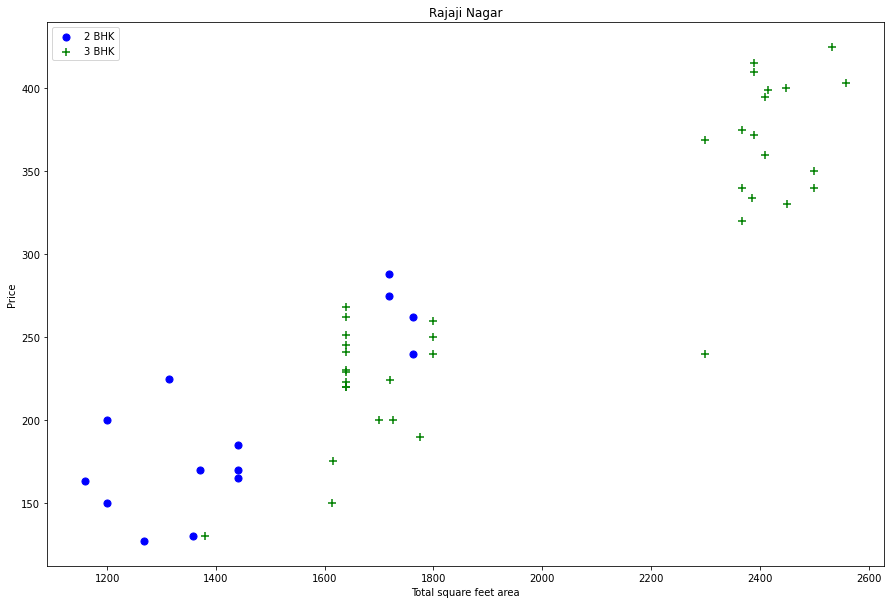

In [37]:
# Plot properties where sqft is equivalent, same location,
# but the properties that have two bedrooms have higher price than properties with three bedrooms

def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    plt.rcParams['figure.figsize'] = (15, 10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s = 50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color = 'green', marker = '+', label = '3 BHK', s = 50)
    plt.xlabel("Total square feet area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7, "Rajaji Nagar")

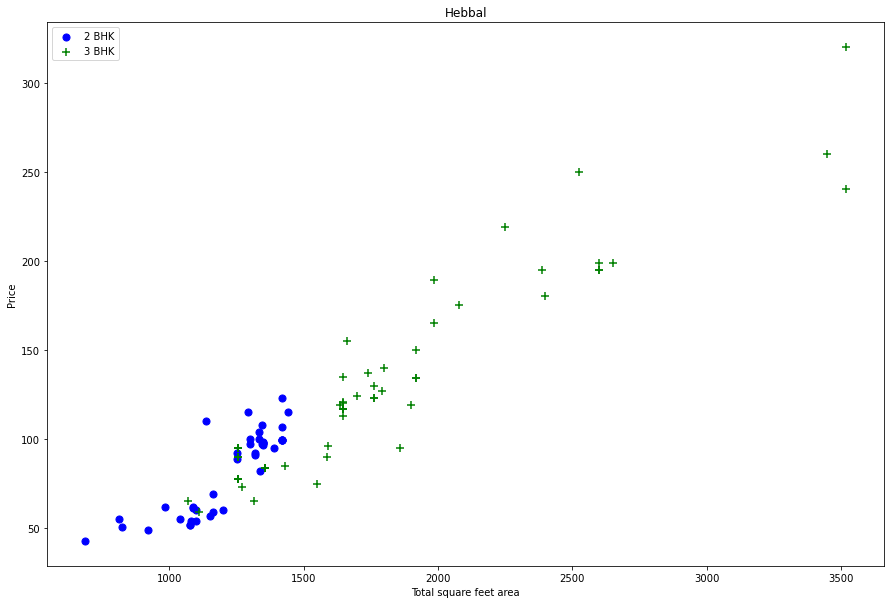

In [38]:
plot_scatter_chart(df7, "Hebbal")

We should remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.
```
{
    '1': {
        'mean': 4000,
        'std': 2000,
        'count': 34
    },
    '2': {
        'mean': 4300,
        'std': 2300,
        'count': 22
    }
}
```
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [41]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            print('-----')
            print('bhk', bhk)
            stats = bhk_stats.get(bhk-1)
            print('stats', stats)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < stats['mean']].index.values)
    return df.drop(exclude_indices, axis = 'index')

df8 = remove_bhk_outliers(df7)

-----
bhk 2
stats None
-----
bhk 3
stats {'mean': 11983.805668016194, 'std': 0.0, 'count': 1}
-----
bhk 4
stats {'mean': 11756.16905248807, 'std': 701.6243657657865, 'count': 3}
-----
bhk 1
stats None
-----
bhk 2
stats {'mean': 5952.380952380952, 'std': 0.0, 'count': 1}
-----
bhk 3
stats {'mean': 7931.806799837383, 'std': 1534.1422783514054, 'count': 8}
-----
bhk 4
stats {'mean': 9151.192151725822, 'std': 1054.731726021645, 'count': 7}
-----
bhk 5
stats {'mean': 7537.92218148637, 'std': 1607.0591069513537, 'count': 3}
-----
bhk 2
stats None
-----
bhk 3
stats {'mean': 3851.8518518518517, 'std': 497.593660834978, 'count': 3}
-----
bhk 4
stats None
-----
bhk 6
stats None
-----
bhk 2
stats None
-----
bhk 3
stats {'mean': 4755.410708222867, 'std': 374.06419031565235, 'count': 3}
-----
bhk 5
stats None
-----
bhk 6
stats {'mean': 3611.1111111111113, 'std': 0.0, 'count': 1}
-----
bhk 1
stats None
-----
bhk 2
stats {'mean': 4628.623188405797, 'std': 371.376811594203, 'count': 2}
-----
bhk 3
sta

stats {'mean': 5155.724160108177, 'std': 750.6157631590067, 'count': 18}
-----
bhk 1
stats None
-----
bhk 2
stats {'mean': 16831.68316831683, 'std': 0.0, 'count': 1}
-----
bhk 3
stats {'mean': 9792.423102012144, 'std': 3818.3998448404645, 'count': 5}
-----
bhk 4
stats {'mean': 7141.805995187703, 'std': 751.0857983228121, 'count': 3}
-----
bhk 1
stats None
-----
bhk 2
stats {'mean': 2520.6090114704184, 'std': 140.15700556082749, 'count': 19}
-----
bhk 3
stats {'mean': 2822.693874744619, 'std': 410.55761448180084, 'count': 37}
-----
bhk 2
stats None
-----
bhk 3
stats {'mean': 3613.5088756107502, 'std': 502.5086800433043, 'count': 24}
-----
bhk 4
stats {'mean': 4500.644242719408, 'std': 1005.213241509808, 'count': 9}
-----
bhk 6
stats None
-----
bhk 3
stats None
-----
bhk 4
stats {'mean': 4090.4654941407116, 'std': 246.87536752515462, 'count': 4}
-----
bhk 2
stats None
-----
bhk 3
stats {'mean': 3979.526682999282, 'std': 296.21104114438486, 'count': 3}
-----
bhk 4
stats {'mean': 4242.4242

-----
bhk 2
stats None
-----
bhk 3
stats {'mean': 4195.182184632629, 'std': 472.40961899077587, 'count': 20}
-----
bhk 6
stats None
-----
bhk 1
stats None
-----
bhk 2
stats {'mean': 4386.46711095142, 'std': 463.4471257552693, 'count': 2}
-----
bhk 3
stats {'mean': 4720.617954190519, 'std': 721.7719786205827, 'count': 40}
-----
bhk 4
stats {'mean': 4427.642898747908, 'std': 504.41094830524696, 'count': 12}
-----
bhk 1
stats None
-----
bhk 2
stats {'mean': 4799.375, 'std': 199.375, 'count': 2}
-----
bhk 3
stats {'mean': 4946.270140994979, 'std': 834.9741219397788, 'count': 19}
-----
bhk 4
stats {'mean': 5382.16497047624, 'std': 896.2587581277162, 'count': 15}
-----
bhk 2
stats None
-----
bhk 3
stats {'mean': 7132.2680042005195, 'std': 2396.0521058736667, 'count': 4}
-----
bhk 4
stats {'mean': 9162.737420366177, 'std': 1759.0622093546074, 'count': 9}
-----
bhk 5
stats {'mean': 10348.082968582745, 'std': 1380.1349845751727, 'count': 5}
-----
bhk 1
stats None
-----
bhk 2
stats {'mean': 4518

bhk 3
stats {'mean': 10067.114093959732, 'std': 0.0, 'count': 1}
-----
bhk 4
stats {'mean': 10018.319753621405, 'std': 1044.2283661863166, 'count': 5}
-----
bhk 1
stats None
-----
bhk 2
stats {'mean': 5159.365079365079, 'std': 1065.8231736741996, 'count': 3}
-----
bhk 3
stats {'mean': 4475.604638481574, 'std': 211.3056933959039, 'count': 12}
-----
bhk 7
stats None
-----
bhk 2
stats None
-----
bhk 3
stats {'mean': 6561.085972850678, 'std': 0.0, 'count': 1}
-----
bhk 4
stats {'mean': 7154.421202441103, 'std': 858.8014581243333, 'count': 3}
-----
bhk 2
stats None
-----
bhk 3
stats {'mean': 9519.730600403604, 'std': 1946.4988338411724, 'count': 23}
-----
bhk 4
stats {'mean': 9691.757083813118, 'std': 2332.1057526607897, 'count': 26}
-----
bhk 2
stats None
-----
bhk 3
stats {'mean': 3872.5655216562704, 'std': 177.44245428443105, 'count': 6}
-----
bhk 1
stats None
-----
bhk 2
stats {'mean': 4892.344497607655, 'std': 107.65550239234472, 'count': 2}
-----
bhk 3
stats {'mean': 4854.565077877619

-----
bhk 2
stats None
-----
bhk 3
stats {'mean': 5176.637205930015, 'std': 925.9779110123278, 'count': 19}
-----
bhk 4
stats {'mean': 6966.244540905622, 'std': 1251.2106654813592, 'count': 10}
-----
bhk 2
stats None
-----
bhk 3
stats {'mean': 6408.0027636555515, 'std': 1008.5806527993847, 'count': 9}
-----
bhk 5
stats None
-----
bhk 3
stats None
-----
bhk 4
stats {'mean': 11677.772648686641, 'std': 1164.2113099564785, 'count': 7}
-----
bhk 1
stats None
-----
bhk 2
stats {'mean': 2874.133538039441, 'std': 174.43064872118748, 'count': 4}
-----
bhk 3
stats {'mean': 3604.54588824458, 'std': 718.1819172813347, 'count': 33}
-----
bhk 4
stats {'mean': 4675.963272449762, 'std': 1139.724491656155, 'count': 20}
-----
bhk 1
stats None
-----
bhk 2
stats {'mean': 5133.293879111827, 'std': 1040.4585511011248, 'count': 9}
-----
bhk 3
stats {'mean': 5376.764753392969, 'std': 940.2539293683719, 'count': 114}
-----
bhk 4
stats {'mean': 6139.2129399546575, 'std': 1182.0586574859085, 'count': 145}
-----


(7329, 7)

In [42]:
df8.shape

(7329, 7)

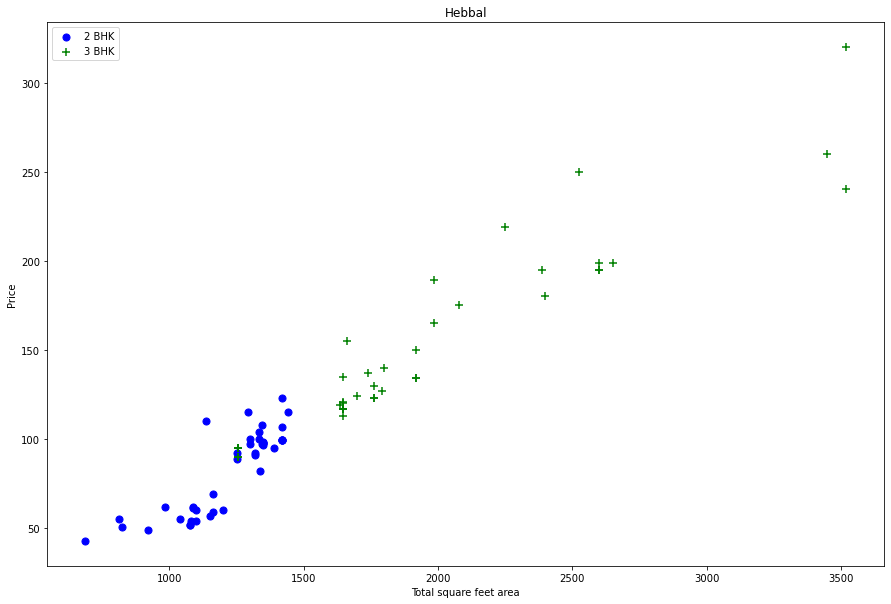

In [43]:
plot_scatter_chart(df8, "Hebbal")

Text(0, 0.5, 'Count')

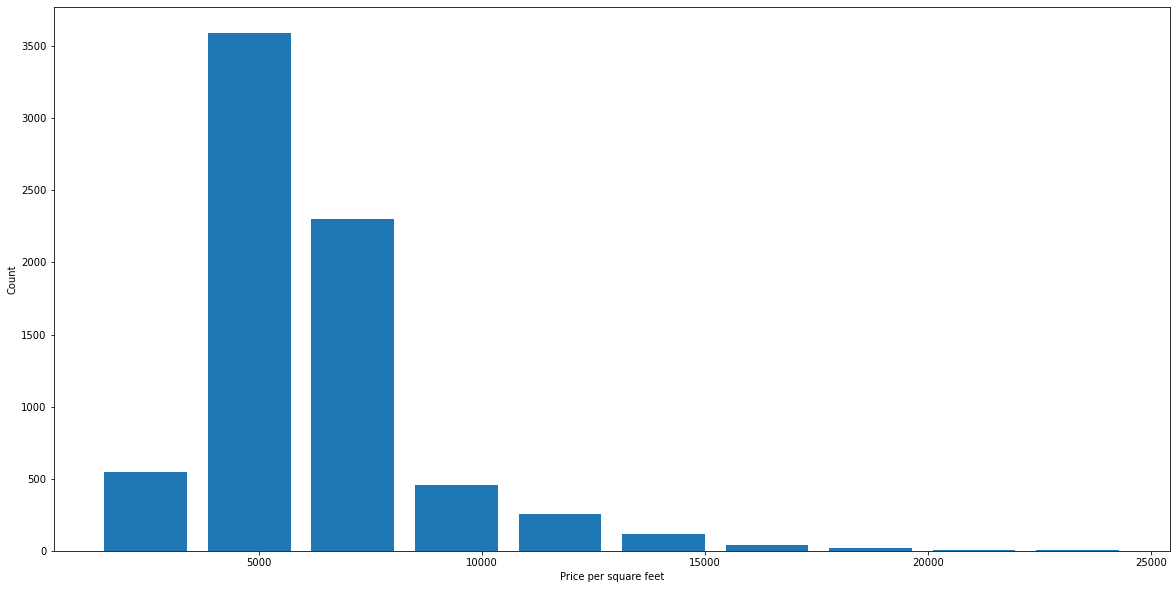

In [44]:
# Plot how many properties we have per sqft area
plt.rcParams["figure.figsize"] = (20, 10)
plt.hist(df8.price_per_sqft, rwidth = 0.8)
plt.xlabel("Price per square feet")
plt.ylabel("Count")

Note: looks somewhat like a normal distribution - acceptable

In [45]:
# Looking at the bathroom feature
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [46]:
# Look at the properties with more than 10 bathrooms
df8[df8.bath > 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

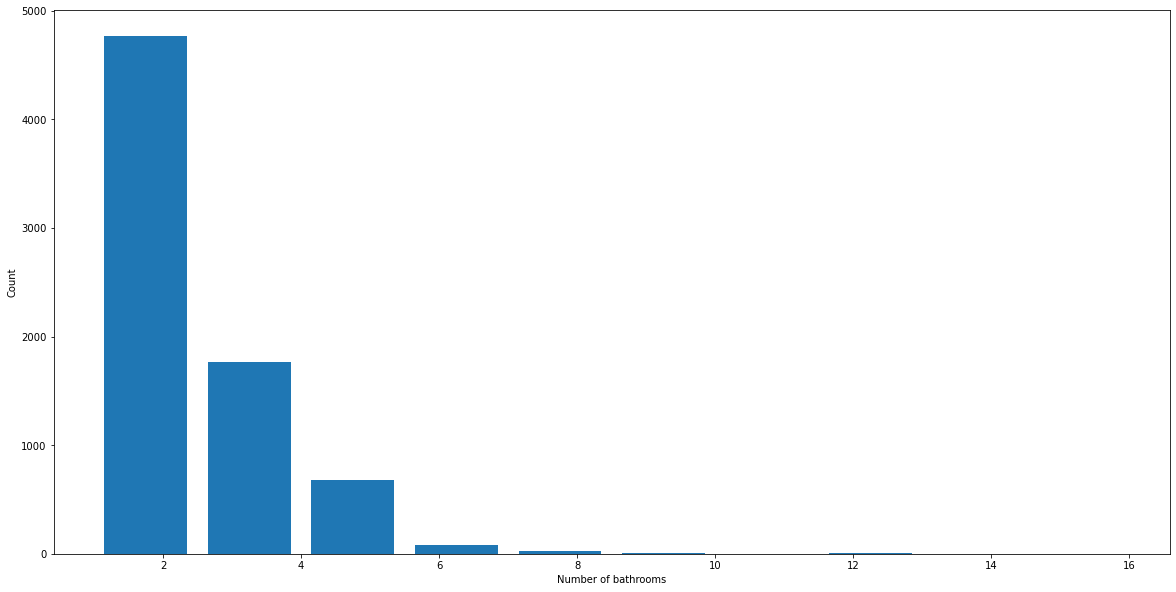

In [48]:
plt.hist(df8.bath, rwidth = 0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [49]:
# Remove outliers where nb_bathrooms > nb_bedrooms + 2
df8[df8.bath > df8.bhk + 2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [50]:
df9 = df8[df8.bath <= df8.bhk + 2]
df9.shape

(7325, 7)

### MODEL BUILDING

In [51]:
# We can remove unnecessary features
df10 = df9.drop(['size', 'price_per_sqft'], axis = 'columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
